In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [46]:
df = pd.read_csv("car_purchasing.csv")
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Information of the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Drop columns which are not required for analysis

In [48]:
data = df.drop(columns=['customer name', 'customer e-mail'])
print(data.head())

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248  


# Check Missing Values


In [49]:
missing_values = data.isnull().sum()
print(missing_values)

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [50]:
print(data.columns)


Index(['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth', 'car purchase amount'],
      dtype='object')


In [51]:
data.rename(columns={'Country': 'country'}, inplace=True)



# Using Label Encoder for Converting String Values into Numerical Values


In [ ]:
from sklearn.preprocessing import LabelEncoder

def convert_country_to_encoded(data):
    label_encoder = LabelEncoder()
    data['country_encoded'] = label_encoder.fit_transform(data['country'])
    return data, label_encoder

print(data.head())


   country_encoded  gender       age  annual Salary  credit card debt  \
0               28       0  0.437034       0.535151          0.578361   
1               18       0  0.417412       0.583086          0.476028   
2                2       1  0.463058       0.422482          0.555797   
3               42       1  0.765427       0.742125          0.719908   
4               27       1  0.746275       0.496614          0.264257   

   net worth  car purchase amount  
0   0.223430             0.370725  
1   0.521402             0.508669  
2   0.631089             0.477827  
3   0.539387             0.822850  
4   0.551331             0.660781  


In [53]:
print(data[['country', 'country_encoded']])


          country  country_encoded
0        Bulgaria               28
1          Belize               18
2         Algeria                2
3    Cook Islands               42
4          Brazil               27
..            ...              ...
495         Nepal              129
496      Zimbabwe              209
497   Philippines              145
498      Botswana               25
499        marlal              210

[500 rows x 2 columns]


# Drop the country name from the dataset

In [54]:
# Drop the 'country' column
data = data.drop(columns=['country'])

# Display the first few rows to verify
print(data.head())


   gender        age  annual Salary  credit card debt    net worth  \
0       0  41.851720    62812.09301      11609.380910  238961.2505   
1       0  40.870623    66646.89292       9572.957136  530973.9078   
2       1  43.152897    53798.55112      11160.355060  638467.1773   
3       1  58.271369    79370.03798      14426.164850  548599.0524   
4       1  57.313749    59729.15130       5358.712177  560304.0671   

   car purchase amount  country_encoded  
0          35321.45877               28  
1          45115.52566               18  
2          42925.70921                2  
3          67422.36313               42  
4          55915.46248               27  


# Shift the country name from last column to first column for better understanding

In [55]:
# Move the last column to the first position
last_column = data.iloc[:, -1]  # Select the last column
data = data.drop(data.columns[-1], axis=1)  # Drop the last column
data.insert(0, last_column.name, last_column)  # Insert it at the first position

# Display the updated DataFrame
print(data.head())


   country_encoded  gender        age  annual Salary  credit card debt  \
0               28       0  41.851720    62812.09301      11609.380910   
1               18       0  40.870623    66646.89292       9572.957136   
2                2       1  43.152897    53798.55112      11160.355060   
3               42       1  58.271369    79370.03798      14426.164850   
4               27       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248  


# Applying the MinMaxScaler 

In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Columns to normalize
columns_to_normalize = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the normalized DataFrame
print(data.head())


   country_encoded  gender       age  annual Salary  credit card debt  \
0               28       0  0.437034       0.535151          0.578361   
1               18       0  0.417412       0.583086          0.476028   
2                2       1  0.463058       0.422482          0.555797   
3               42       1  0.765427       0.742125          0.719908   
4               27       1  0.746275       0.496614          0.264257   

   net worth  car purchase amount  
0   0.223430             0.370725  
1   0.521402             0.508669  
2   0.631089             0.477827  
3   0.539387             0.822850  
4   0.551331             0.660781  


# Splitting the dataset

In [57]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop(columns=['car purchase amount'])  # Predictors
y = data['car purchase amount']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (400, 6)
Testing set: (100, 6)


# Applying the ANN model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
model = Sequential()

# Add input and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print(model.summary())


c:\Users\KIIT\Desktop\python\project1\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

None


# Train the model and check the visualisation

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 304.2524 - mae: 14.5197 - val_loss: 9.6769 - val_mae: 2.5476
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9463 - mae: 1.8821 - val_loss: 11.9258 - val_mae: 3.0986
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8598 - mae: 2.5977 - val_loss: 0.1732 - val_mae: 0.3395
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7626 - mae: 0.6614 - val_loss: 0.4655 - val_mae: 0.5405
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2938 - mae: 0.4413 - val_loss: 0.1926 - val_mae: 0.3855
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1363 - mae: 0.3067 - val_loss: 0.1119 - val_mae: 0.2885
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0955 - mae: 0.2481 - val_loss: 0.0823 - val_mae: 0.2429
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0781 - mae: 0.2249 - val_loss: 0.0729 - val_mae: 0.2312
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - los

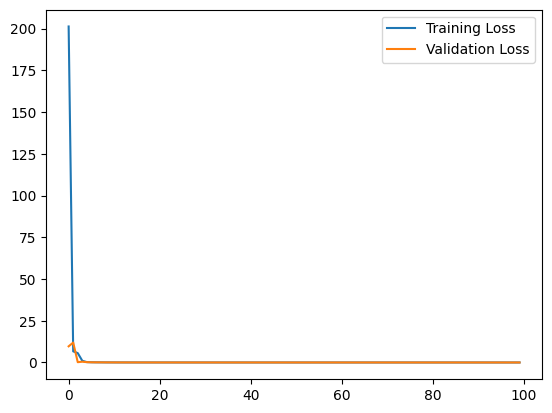

In [59]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Visualize the training process
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# Evaluation Matrics

In [80]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean absolute error:{mae}")


Mean Squared Error: 0.00020192394727967873
Root Mean Squared Error: 0.014209994626307173
Mean absolute error:0.010704442670650804


# R-Squared value for accuracy check

In [61]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.9905726698856165


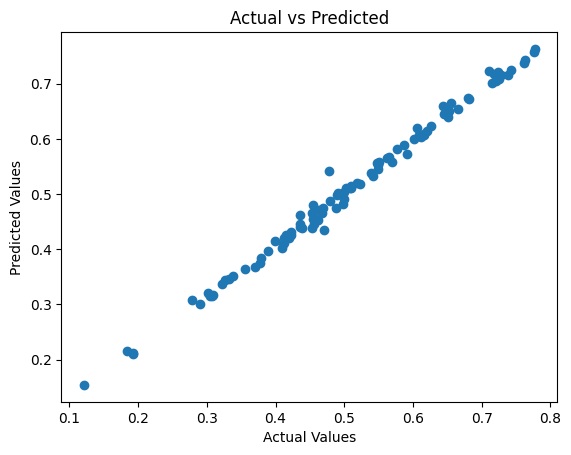

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


# comparison of actual and predicted values

In [ ]:
comparison = pd.DataFrame({
    'Actual Value': y_test.values,  
    'Predicted Value': y_pred.flatten()  
})

print(comparison.head())

   Actual Value  Predicted Value
0      0.522293         0.517314
1      0.507872         0.510589
2      0.761688         0.737867
3      0.321651         0.337478
4      0.724806         0.712057


# Plotting the residuals

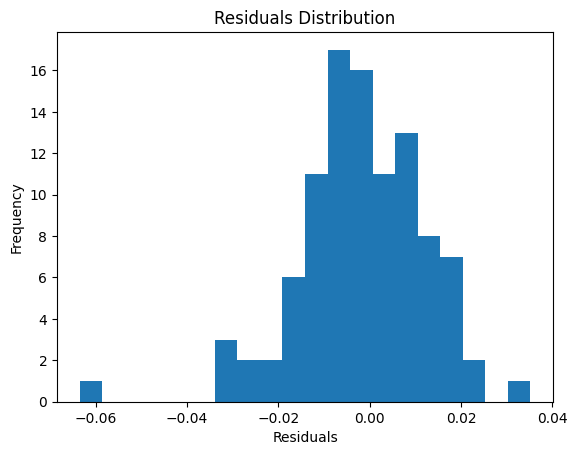

In [ ]:
# Ensure y_pred is flattened to a 1D array
y_pred = y_pred.flatten()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals histogram
import matplotlib.pyplot as plt
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


# Encoding Country name for validation purpose

In [ ]:
import numpy as np

def encode_country_value(country_name, label_encoder):
    # Check if the country is already in the LabelEncoder's classes
    if country_name not in label_encoder.classes_:
        # Convert classes_ to a list, add the new country, and reassign as a NumPy array
        new_classes = np.append(label_encoder.classes_, country_name)
        label_encoder.classes_ = new_classes
        print(f"New country '{country_name}' added to the encoder.")
    
    # Encode the country
    return label_encoder.transform([country_name])[0]


# Validating the Model Using Random Input


In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import load_model

# Predefined LabelEncoder (fit it with training data during training and save it)
label_encoder = LabelEncoder()
label_encoder.fit(['India', 'USA', 'Australia', 'Canada'])  # Replace with actual countries in training set

# Hardcoded input values
country = "India"  # Replace with the desired country name
gender = 1  # 0 for Female, 1 for Male
age = 35
annual_salary = 65000
credit_card_debt = 15000
net_worth = 300000

# Encode the country name using the function
country_encoded = encode_country_value(country, label_encoder)

# Prepare input data
feature_names = ['country_encoded', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth']
input_data = pd.DataFrame([[country_encoded, gender, age, annual_salary, credit_card_debt, net_worth]],
                          columns=feature_names)

# Load pre-trained scaler and model
model = load_model("car_purchase_model.keras")

# Ensure the scaler is fitted with training data
scaler = MinMaxScaler()  # Load the scaler used during training
scaler.fit(X_train[numerical_features])  # Replace 'X_train' and 'numerical_features' with training data

# Normalize numerical features
numerical_features = ['age', 'annual Salary', 'credit card debt', 'net worth']
input_data[numerical_features] = scaler.transform(input_data[numerical_features])

# Predict using the model
predicted_price = model.predict(input_data)
print(f"Predicted Car Purchase Amount: {predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Car Purchase Amount: 148111.62
